In [7]:
import pandas as pd
import numpy as np
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Divyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Divyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Divyanshu\AppData\Roaming\nltk_data...


True

In [8]:
!pip install -U scikit-learn scipy matplotlib

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.0 MB 8.5 MB/s eta 0:00:02
   ---------------------------------------  10.7/11.0 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 20.7 MB/s eta 0:00:00


In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
customers = pd.read_csv('customers2afd6ea.csv')
reasons = pd.read_csv('reason18315ff.csv')
sentiments = pd.read_csv('sentiment_statisticscc1e57a.csv')
test = pd.read_csv('testbc7185d.csv')

calls = pd.read_csv('callsf0d4f5a.csv')

calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])
calls['call_duration'] = (calls['call_end_datetime'] - calls['agent_assigned_datetime']).dt.total_seconds()
calls['wait_time'] = (calls['agent_assigned_datetime'] - calls['call_start_datetime']).dt.total_seconds()

df = pd.merge(calls, sentiments, on=['call_id', 'agent_id'], how='left')
df = pd.merge(df, reasons, on='call_id', how='left')
df = pd.merge(df, customers, on='customer_id', how='left')

df['agent_tone'] = df['agent_tone'].fillna('neutral')
df['customer_tone'] = df['customer_tone'].fillna('neutral')
df['average_sentiment'] = df['average_sentiment'].fillna(0)
df['silence_percent_average'] = df['silence_percent_average'].fillna(df['silence_percent_average'].mean())
df['primary_call_reason'] = df['primary_call_reason'].fillna('Unknown')
df['elite_level_code'] = df['elite_level_code'].fillna(0)
df['customer_name'] = df['customer_name'].fillna('Unknown')

df['elite_level_code'] = df['elite_level_code'].astype(int)

df = df.drop_duplicates()

df = df.reset_index(drop=True)

In [13]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,wait_time,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,neutral,angry,-0.04,0.39,Voluntary Cancel,Matthew Foster,4
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,calm,neutral,0.02,0.35,Booking,Tammy Walters,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,neutral,polite,-0.13,0.32,IRROPS,Jeffery Dixon,0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0


In [16]:
!pip install --upgrade nltk

In [17]:
nltk.data.path = []  # Clear existing paths
nltk.data.path.append('nltk_data')  # Re-add default path

In [32]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Divyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Divyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Divyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
print(nltk.data.path)

['nltk_data']


In [33]:
from nltk.tokenize import TreebankWordTokenizer

In [15]:
df['call_transcript'][0]

"\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help

In [34]:
tokenizer = TreebankWordTokenizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [35]:
df['clean_transcript'] = df['call_transcript'].apply(preprocess_text)

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Divyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
nltk.data.path.append('C:/Users/Divyanshu/AppData/Roaming/nltk_data')

In [36]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,wait_time,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,clean_transcript
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,neutral,angry,-0.04,0.39,Voluntary Cancel,Matthew Foster,4,agent thank calling united airline customer se...
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,calm,neutral,0.02,0.35,Booking,Tammy Walters,0,agent thank calling united airline name sam he...
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,neutral,polite,-0.13,0.32,IRROPS,Jeffery Dixon,0,agent thank calling united airline customer se...
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2,agent thank calling united airline customer se...
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0,agent thank calling united airline customer se...


In [37]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_transcript'])

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [40]:
def get_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for idx, topic in enumerate(model.components_):
        top_words = [words[i] for i in topic.argsort()[-top_n:]]
        topics[idx] = top_words
    return topics

In [41]:
topics = get_topics(lda_model, vectorizer, top_n=10)

In [42]:
for topic_num, words in topics.items():
    print(f"Topic {topic_num}: {', '.join(words)}")

Topic 0: hour, frustration, meeting, understand, issue, tomorrow, sir, travel, today, delay
Topic 1: problem, travel, yeah, new, reservation, need, date, work, fee, change
Topic 2: sure, travel, good, wanted, yeah, know, chicago, time, seat, check
Topic 3: really, hour, time, experience, voucher, travel, make, issue, refund, delay
Topic 4: meeting, yeah, chicago, really, option, change, work, earlier, time, pm


In [44]:
reasons.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [45]:
df['primary_call_reason'].unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Unknown', 'Voluntary   Change',
       'Post Flight', 'Check In', 'Other  Topics', 'Communications',
       'Schedule Change', 'Products & Services', 'IRROPS  ',
       'Digital   Support', 'Seating  ', 'Disability',
       'Unaccompanied Minor', ' Baggage', 'Traveler  Updates',
       'Communications  ', 'ETC', 'Upgrade  ', 'Unaccompanied Minor  ',
       'Voluntary Change', 'Voluntary Change  ', 'Checkout  ',
       'Mileage Plus', 'Mileage Plus  ', 'Booking  ', 'Baggage  ',
       'Post-Flight', 'Post-Flight  ', 'Schedule Change  ', 'Baggage',
       'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Sup

In [46]:
topic_values = lda_model.transform(dtm)
df['dominant_topic'] = topic_values.argmax(axis=1)

In [66]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,wait_time,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,clean_transcript,dominant_topic,handle_time,waiting_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,neutral,angry,-0.04,0.39,Voluntary Cancel,Matthew Foster,4,agent thank calling united airline customer se...,0,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,calm,neutral,0.02,0.35,Booking,Tammy Walters,0,agent thank calling united airline name sam he...,1,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,neutral,polite,-0.13,0.32,IRROPS,Jeffery Dixon,0,agent thank calling united airline customer se...,1,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2,agent thank calling united airline customer se...,1,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0,agent thank calling united airline customer se...,1,540.0,600.0


In [47]:
topic_reason_matrix = pd.crosstab(df['dominant_topic'], df['primary_call_reason'])
topic_reason_percentage = topic_reason_matrix.div(topic_reason_matrix.sum(axis=1), axis=0)
topic_reason_percentage

primary_call_reason,Baggage,Baggage,Baggage,Booking,Booking,Check In,Check-In,Check-In,Checkout,Checkout,Communications,Communications,Digital Support,Digital Support,Digital Support,Digital Support,Disability,Disability,ETC,ETC,IRROPS,IRROPS,Mileage Plus,Mileage Plus,Mileage Plus,Mileage Plus,Other Topics,Other Topics,Other Topics,Post Flight,Post-Flight,Post-Flight,Products & Services,Products and Services,Products and Services,Schedule Change,Schedule Change,Seating,Seating,Traveler Updates,Traveler Updates,Traveler Updates,Traveler Updates,Unaccompanied Minor,Unaccompanied Minor,Unknown,Upgrade,Upgrade,Voluntary Change,Voluntary Cancel,Voluntary Change,Voluntary Cancel,Voluntary Cancel,Voluntary Change,Voluntary Change
dominant_topic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.001133,0.037469,0.001600,0.034269,0.000600,0.004800,0.019201,0.000333,0.026668,0.000267,0.050870,0.000333,0.002400,0.000933,0.013734,0.000400,0.006200,0.000200,0.013534,0.000267,0.184146,0.002867,0.001533,0.001867,0.069471,0.001533,0.003467,0.007200,0.000333,0.006000,0.059004,0.001533,0.006400,0.040403,0.000667,0.009734,0.000600,0.086939,0.001867,0.002200,0.000400,0.010334,0.000133,0.001400,0.000000,0.074605,0.035536,0.000933,0.001867,0.003534,0.001533,0.018868,0.000200,0.145010,0.002667
1,0.001192,0.038466,0.002259,0.037807,0.000784,0.005459,0.020300,0.000471,0.025697,0.000784,0.054342,0.001004,0.001632,0.001035,0.012770,0.000188,0.004769,0.000094,0.011985,0.000126,0.186496,0.004016,0.002039,0.002008,0.078502,0.001412,0.003075,0.007467,0.000126,0.004957,0.051393,0.001161,0.006401,0.036396,0.000879,0.009099,0.000345,0.086596,0.002102,0.001506,0.000502,0.011044,0.000188,0.001255,0.000031,0.070815,0.035674,0.000596,0.003075,0.003985,0.002353,0.017476,0.000502,0.142727,0.002636
2,0.001624,0.033475,0.001499,0.034099,0.000874,0.005871,0.021859,0.000250,0.023108,0.000749,0.049588,0.000749,0.001249,0.001249,0.018111,0.000375,0.006620,0.000125,0.014114,0.000749,0.151511,0.003248,0.001749,0.002248,0.079815,0.000749,0.004622,0.009243,0.000375,0.003747,0.049463,0.000999,0.006245,0.038471,0.001374,0.011242,0.000250,0.094804,0.002498,0.001124,0.000625,0.011366,0.000125,0.001749,0.000000,0.068948,0.039970,0.000999,0.003372,0.004746,0.001874,0.018861,0.000125,0.163752,0.003372
3,0.001104,0.030149,0.000883,0.032579,0.000552,0.005522,0.022198,0.000331,0.026946,0.000552,0.051795,0.000442,0.001657,0.001104,0.013363,0.000331,0.005522,0.000110,0.014467,0.000663,0.202871,0.003644,0.001988,0.001657,0.075207,0.001215,0.002209,0.008062,0.000331,0.005191,0.053230,0.000994,0.005853,0.039978,0.001215,0.010050,0.000221,0.085257,0.001325,0.001546,0.000883,0.010050,0.000110,0.002098,0.000000,0.070790,0.043291,0.000883,0.003092,0.003865,0.002430,0.018553,0.000000,0.129210,0.002430
4,0.001015,0.036431,0.001777,0.038335,0.000254,0.005331,0.022722,0.000508,0.024372,0.001015,0.053059,0.001777,0.002920,0.001015,0.014851,0.000000,0.005839,0.000127,0.012821,0.000254,0.165143,0.003046,0.001142,0.001269,0.079081,0.001904,0.003427,0.009520,0.000127,0.006093,0.059406,0.001396,0.009266,0.045189,0.000508,0.011424,0.000000,0.079716,0.001904,0.001650,0.000381,0.010536,0.000000,0.001142,0.000000,0.074638,0.038081,0.000889,0.002412,0.003173,0.001777,0.018406,0.000635,0.137852,0.004443


In [48]:
print(topic_reason_percentage)

primary_call_reason   Baggage   Baggage  Baggage     Booking  Booking    \
dominant_topic                                                            
0                    0.001133  0.037469   0.001600  0.034269   0.000600   
1                    0.001192  0.038466   0.002259  0.037807   0.000784   
2                    0.001624  0.033475   0.001499  0.034099   0.000874   
3                    0.001104  0.030149   0.000883  0.032579   0.000552   
4                    0.001015  0.036431   0.001777  0.038335   0.000254   

primary_call_reason  Check In  Check-In  Check-In    Checkout  Checkout    \
dominant_topic                                                              
0                    0.004800  0.019201    0.000333  0.026668    0.000267   
1                    0.005459  0.020300    0.000471  0.025697    0.000784   
2                    0.005871  0.021859    0.000250  0.023108    0.000749   
3                    0.005522  0.022198    0.000331  0.026946    0.000552   
4           

In [49]:
call_reason_counts = df['primary_call_reason'].value_counts()
threshold = call_reason_counts.mean()
high_volume_reasons = call_reason_counts[call_reason_counts > threshold]

In [50]:
high_volume_reasons

primary_call_reason
IRROPS                   13057
Voluntary Change         10291
Seating                   6223
Mileage Plus              5487
Unknown                   5157
Post-Flight               3869
Communications            3779
Products and Services     2792
Upgrade                   2682
Baggage                   2616
Booking                   2589
Checkout                  1840
Check-In                  1490
Name: count, dtype: int64

In [51]:
call_reason_counts

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Unknown                     5157
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                

In [52]:
for topic_num in range(5):
    print(f"Topic {topic_num} Top Call Reasons:")
    top_reasons = topic_reason_percentage.loc[topic_num].sort_values(ascending=False).head(5)
    print(top_reasons)
    print("\n")

Topic 0 Top Call Reasons:
primary_call_reason
IRROPS              0.184146
Voluntary Change    0.145010
Seating             0.086939
Unknown             0.074605
Mileage Plus        0.069471
Name: 0, dtype: float64


Topic 1 Top Call Reasons:
primary_call_reason
IRROPS              0.186496
Voluntary Change    0.142727
Seating             0.086596
Mileage Plus        0.078502
Unknown             0.070815
Name: 1, dtype: float64


Topic 2 Top Call Reasons:
primary_call_reason
Voluntary Change    0.163752
IRROPS              0.151511
Seating             0.094804
Mileage Plus        0.079815
Unknown             0.068948
Name: 2, dtype: float64


Topic 3 Top Call Reasons:
primary_call_reason
IRROPS              0.202871
Voluntary Change    0.129210
Seating             0.085257
Mileage Plus        0.075207
Unknown             0.070790
Name: 3, dtype: float64


Topic 4 Top Call Reasons:
primary_call_reason
IRROPS              0.165143
Voluntary Change    0.137852
Seating             0.079716

In [53]:
self_solvable_reasons = ['Booking', 'Check-In', 'Baggage', 'Voluntary Change', 'Mileage Plus']
self_solvable_calls = df[df['primary_call_reason'].isin(self_solvable_reasons)]
num_self_solvable_calls = len(self_solvable_calls)
total_calls = len(df)
percentage_self_solvable = (num_self_solvable_calls / total_calls) * 100

print(f"Self-solvable calls: {num_self_solvable_calls}")
print(f"Total calls: {total_calls}")
print(f"Percentage of self-solvable calls: {percentage_self_solvable:.2f}%")

Self-solvable calls: 22473
Total calls: 71810
Percentage of self-solvable calls: 31.30%


In [56]:
self_solvable_calls['handle_time'] = self_solvable_calls['call_duration']
self_solvable_calls['waiting_time'] = self_solvable_calls['wait_time']
self_solvable_calls

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration,wait_time,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,clean_transcript,dominant_topic,handle_time,waiting_time
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,calm,neutral,0.02,0.35,Booking,Tammy Walters,0,agent thank calling united airline name sam he...,1,720.0,180.0
124,3628122319,9970923895,878048,2024-08-01 07:00:00,2024-08-01 07:03:00,2024-08-01 07:06:00,\n\nAgent: Thank you for calling United Airlin...,180.0,180.0,calm,neutral,0.08,0.39,Booking,Matthew Foster,2,agent thank calling united airline name james ...,1,180.0,180.0
147,4809910796,9723822305,499403,2024-08-01 08:10:00,2024-08-01 08:13:00,2024-08-01 08:23:00,\n\nAgent: Thank you for calling United Airlin...,600.0,180.0,neutral,angry,-0.22,0.44,Booking,Deborah Morse,0,agent thank calling united airline customer se...,0,600.0,180.0
150,972292759,480562026,289402,2024-08-01 08:11:00,2024-08-01 08:15:00,2024-08-01 08:17:00,\n\nAgent: Thank you for calling United Airlin...,120.0,240.0,calm,calm,0.35,0.23,Booking,Sarah Liu,0,agent thank calling united airline customer se...,1,120.0,240.0
168,2328809947,8389447762,153460,2024-08-01 08:24:00,2024-08-01 08:27:00,2024-08-01 08:29:00,\n\nAgent: Thank you for calling United Airlin...,120.0,180.0,neutral,angry,0.00,0.29,Booking,Nicole Turner,0,agent thank calling united airline steve help ...,3,120.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71692,3833043902,9740391589,187770,2024-08-31 22:03:00,2024-08-31 22:14:00,2024-08-31 22:15:00,\n\nAgent: Thank you for calling United Airlin...,60.0,660.0,calm,neutral,0.13,0.02,Baggage,Kristina Mcmahon,0,agent thank calling united airline name sarah ...,1,60.0,660.0
71702,7406516045,4585723663,306996,2024-08-31 22:15:00,2024-08-31 22:20:00,2024-08-31 22:22:00,\n\nAgent: Thank you for calling United Airlin...,120.0,300.0,neutral,polite,-0.10,0.25,Booking,Lisa Butler,1,agent thank calling united airline sarah help ...,1,120.0,300.0
71723,6376108996,7920543517,198489,2024-08-31 22:36:00,2024-08-31 22:39:00,2024-08-31 22:43:00,\n\nAgent: Thank you for calling United Airlin...,240.0,180.0,neutral,frustrated,-0.06,0.01,Booking,Jamie Martinez,1,agent thank calling united airline name alex h...,0,240.0,180.0
71784,4947993888,8159089068,161354,2024-08-31 23:29:00,2024-08-31 23:37:00,2024-08-31 23:45:00,\n\nAgent: Thank you for calling United Airlin...,480.0,480.0,calm,angry,0.06,0.50,Baggage,April Schmidt,3,agent thank calling united airline steve help ...,0,480.0,480.0


In [58]:
df['handle_time'] = df['call_duration']
df['waiting_time'] = df['wait_time']

In [59]:
total_handle_time_self_solvable = self_solvable_calls['handle_time'].sum()
total_handle_time = df['handle_time'].sum()
percentage_handle_time_saved = (total_handle_time_self_solvable / total_handle_time) * 100

print(f"Total handle time for self-solvable calls: {total_handle_time_self_solvable / 3600:.2f} hours")
print(f"Percentage of total handle time: {percentage_handle_time_saved:.2f}%")

Total handle time for self-solvable calls: 4133.62 hours
Percentage of total handle time: 29.73%


In [60]:
for topic_num in df['dominant_topic'].unique():
    topic_calls = df[df['dominant_topic'] == topic_num]
    topic_call_reasons = topic_calls['primary_call_reason'].value_counts(normalize=True).head(5)
    print(f"Topic {topic_num} Top Call Reasons:")
    print(topic_call_reasons)
    print("\n")

Topic 0 Top Call Reasons:
primary_call_reason
IRROPS              0.184146
Voluntary Change    0.145010
Seating             0.086939
Unknown             0.074605
Mileage Plus        0.069471
Name: proportion, dtype: float64


Topic 1 Top Call Reasons:
primary_call_reason
IRROPS              0.186496
Voluntary Change    0.142727
Seating             0.086596
Mileage Plus        0.078502
Unknown             0.070815
Name: proportion, dtype: float64


Topic 2 Top Call Reasons:
primary_call_reason
Voluntary Change    0.163752
IRROPS              0.151511
Seating             0.094804
Mileage Plus        0.079815
Unknown             0.068948
Name: proportion, dtype: float64


Topic 3 Top Call Reasons:
primary_call_reason
IRROPS              0.202871
Voluntary Change    0.129210
Seating             0.085257
Mileage Plus        0.075207
Unknown             0.070790
Name: proportion, dtype: float64


Topic 4 Top Call Reasons:
primary_call_reason
IRROPS              0.165143
Voluntary Change    0

In [61]:
self_solvable_calls = df[df['primary_call_reason'].isin(self_solvable_reasons)]

average_sentiment_self_solvable = self_solvable_calls['average_sentiment'].mean()
average_sentiment_all = df['average_sentiment'].mean()

print(f"Average sentiment for self-solvable calls: {average_sentiment_self_solvable:.2f}")
print(f"Average sentiment for all calls: {average_sentiment_all:.2f}")

Average sentiment for self-solvable calls: -0.02
Average sentiment for all calls: -0.03


In [62]:
for topic_num, words in topics.items():
    print(f"Topic {topic_num}: {', '.join(words)}")

Topic 0: hour, frustration, meeting, understand, issue, tomorrow, sir, travel, today, delay
Topic 1: problem, travel, yeah, new, reservation, need, date, work, fee, change
Topic 2: sure, travel, good, wanted, yeah, know, chicago, time, seat, check
Topic 3: really, hour, time, experience, voucher, travel, make, issue, refund, delay
Topic 4: meeting, yeah, chicago, really, option, change, work, earlier, time, pm


In [63]:
self_solvable_reasons = ['Voluntary Change', 'Voluntary Cancel', 'Seating', 'Mileage Plus', 'Booking', 'Check-In', 'Baggage']
self_solvable_calls = df[df['primary_call_reason'].str.strip().isin(self_solvable_reasons)]
num_self_solvable_calls = len(self_solvable_calls)
total_calls = len(df)
percentage_self_solvable = (num_self_solvable_calls / total_calls) * 100

print(f"Self-solvable calls: {num_self_solvable_calls}")
print(f"Total calls: {total_calls}")
print(f"Percentage of self-solvable calls: {percentage_self_solvable:.2f}%")

Self-solvable calls: 30768
Total calls: 71810
Percentage of self-solvable calls: 42.85%


In [64]:
total_handle_time_self_solvable = self_solvable_calls['handle_time'].sum()
total_handle_time = df['handle_time'].sum()
percentage_handle_time_saved = (total_handle_time_self_solvable / total_handle_time) * 100

print(f"Total handle time for self-solvable calls: {total_handle_time_self_solvable / 3600:.2f} hours")
print(f"Percentage of total handle time: {percentage_handle_time_saved:.2f}%")

Total handle time for self-solvable calls: 5336.10 hours
Percentage of total handle time: 38.38%


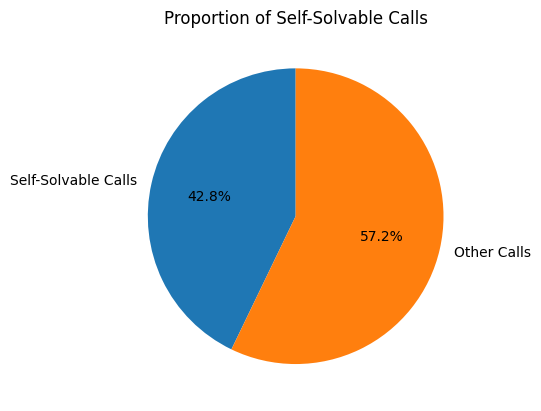

In [65]:
import matplotlib.pyplot as plt

call_counts = pd.Series({
    'Self-Solvable Calls': num_self_solvable_calls,
    'Other Calls': total_calls - num_self_solvable_calls
})

call_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Self-Solvable Calls')
plt.ylabel('')
plt.show()